In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential,load_model
import keras

In [2]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Check if the file exists
file_path = '../datasets/emnist-letters-train.csv'
if os.path.isfile(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

Current working directory: c:\Users\ayseg\OneDrive\Masaüstü\bitirme_kod\train
The file ../datasets/emnist-letters-train.csv exists.


In [3]:
train_images = pd.read_csv("../datasets/emnist-letters-train.csv",header=None)
test_images = pd.read_csv("../datasets/emnist-letters-test.csv",header=None)
map_images = pd.read_csv("../datasets/emnist-letters-mapping.txt",header=None) 


In [4]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values


ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
# plt.imshow(train_x[2])
# train_x.shape

train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)

In [5]:
# CNN modeli oluşturma (BİZİM MODEL)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))


C:\Users\ayseg\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,140 (1.81 MB)

 Trainable params: 474,140 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 30, callbacks=[early_stopper]
)

Epoch 1/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 73s 25ms/step - accuracy: 0.4793 - loss: 1.7036 - val_accuracy: 0.8730 - val_loss: 0.4063
Epoch 2/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.8768 - loss: 0.4223 - val_accuracy: 0.9034 - val_loss: 0.3181
Epoch 3/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9021 - loss: 0.3375 - val_accuracy: 0.9012 - val_loss: 0.3075
Epoch 4/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 94s 34ms/step - accuracy: 0.9115 - loss: 0.3016 - val_accuracy: 0.9116 - val_loss: 0.2955
Epoch 5/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9172 - loss: 0.2812 - val_accuracy: 0.9093 - val_loss: 0.3005
Epoch 6/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9234 - loss: 0.2613 - val_accuracy: 0.9139 - val_loss: 0.2874
Epoch 7/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 73s 26ms/step - accuracy: 0.9273 - loss: 0.2441 - val_accuracy: 0.9151 - val_loss: 0.2855
Epoch 8/30
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 73s 26ms/step - accuracy: 0.9293 -

In [8]:
model.save("../models/letters_model.h5")

ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

In [9]:
# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)-1)) # int(i)-1  : -1 eklendi çünkü tahmin işleminde etiketlerde kayma vardı, gerçek etiket:A tahmin edilen:B oluyordu.

# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)


ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("../mapping/last-emnist-letters-mapping.csv",index=False,header=True)

In [15]:
# Confusion Matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
y_pred = []
y_true = []

for x, y in test_x:
    batch_predictions = model.predict(x)
    y_pred.extend(np.argmax(batch_predictions, axis=1))
    y_true.extend(np.argmax(y, axis=1))
    if len(y_true) >= test_x.n:
        break

conf_matrix = tf.math.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=list(test_x.class_indices.keys()), yticklabels=list(test_x.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: too many values to unpack (expected 2)

463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


ValueError: The number of FixedLocator locations (52), usually from a call to set_ticks, does not match the number of ticklabels (2).

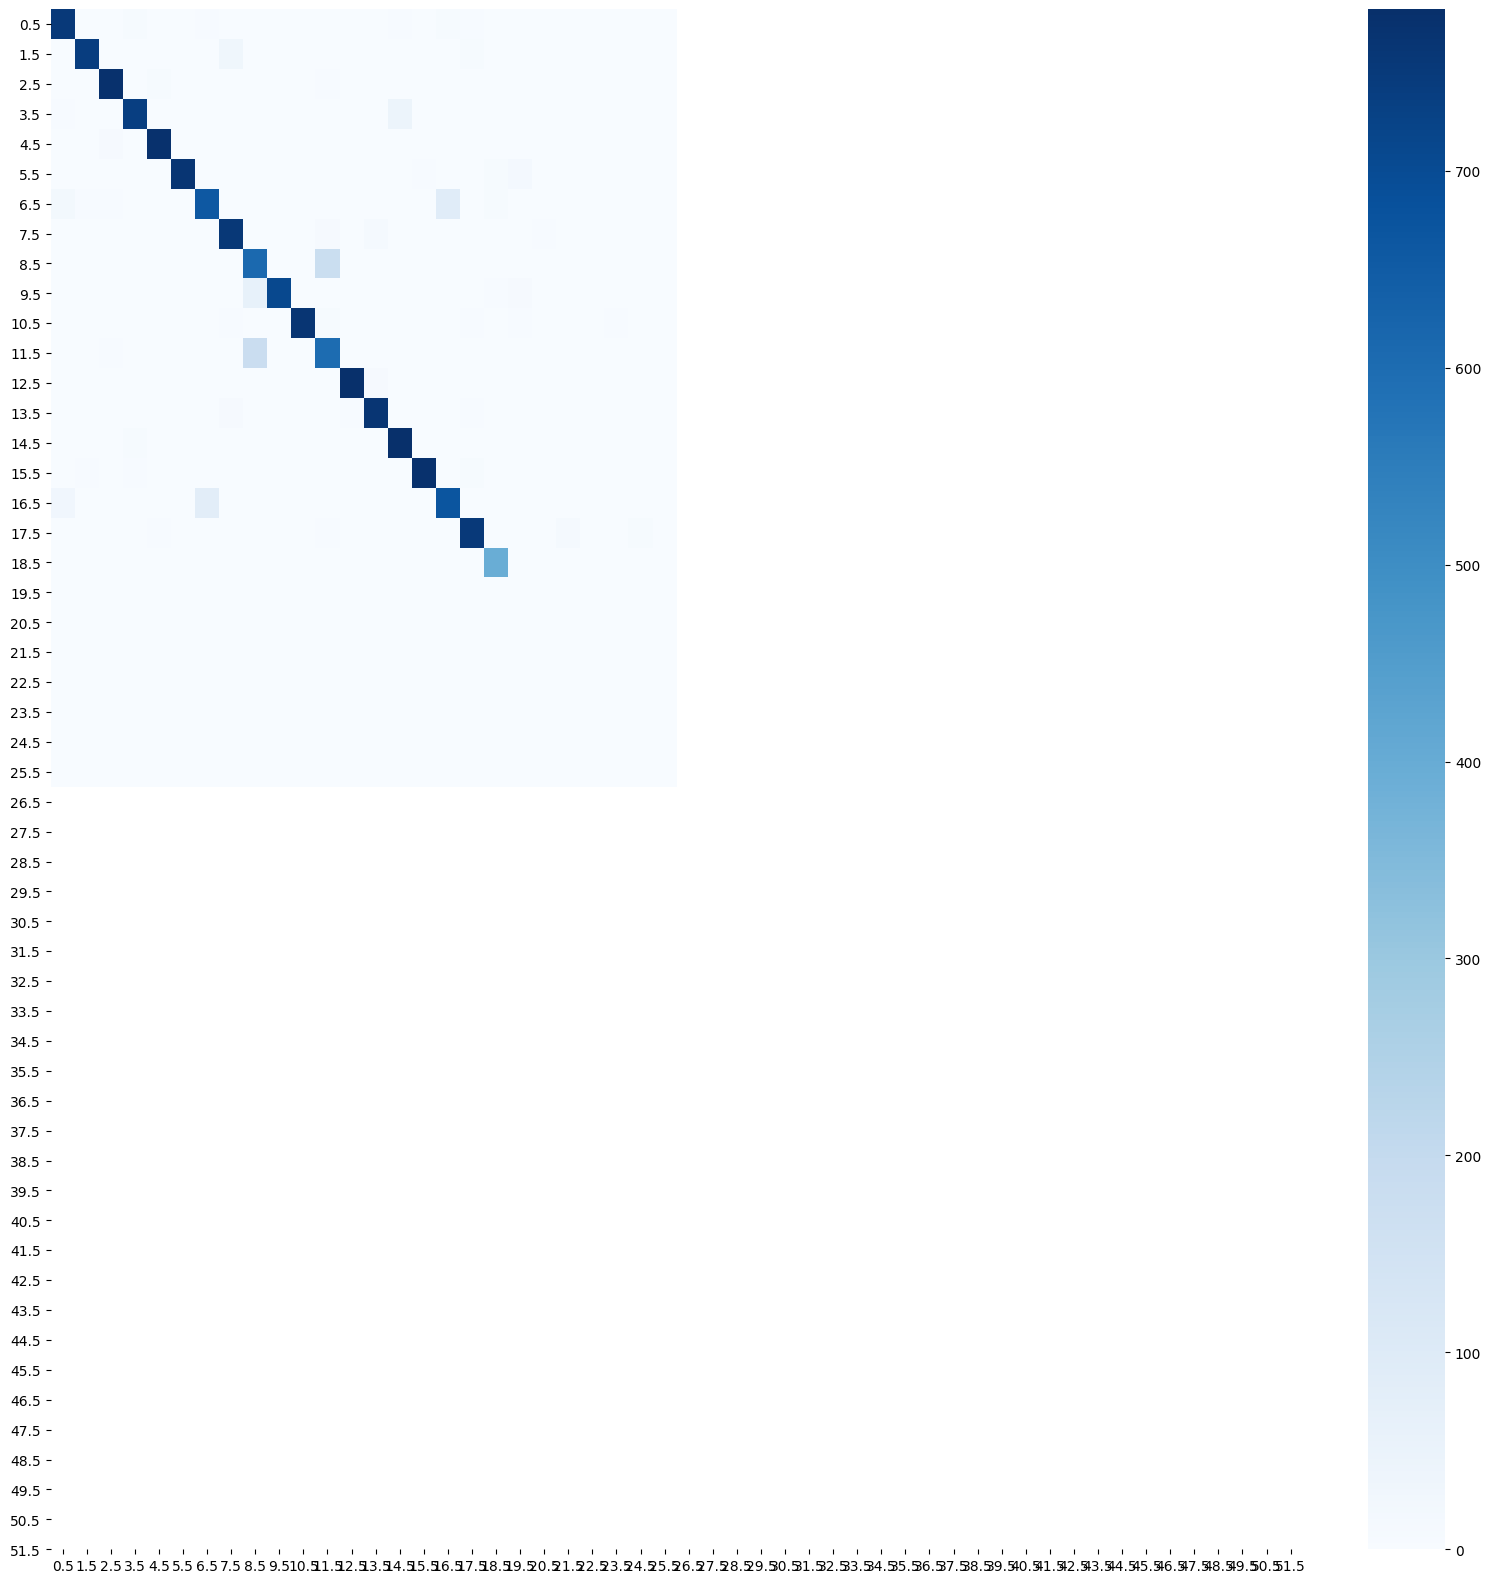

In [23]:
# Modelin tahminlerini al
y_pred_prob = model.predict(test_x)
y_pred = np.argmax(y_pred_prob, axis=1)

# Gerçek etiketler (test_y) ile tahmin edilen etiketler (y_pred) arasında confusion matrisi hesapla
conf_mat = confusion_matrix(test_y, y_pred)

# Görselleştirme
plt.figure(figsize=(20, 20))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=ascii_map, yticklabels=ascii_map)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [27]:
from sklearn.metrics import confusion_matrix
#Test verileri üzerinde tahmin yapın
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_y, axis=1)

#Confusion matrisini hesaplayın
conf_matrix = confusion_matrix(y_true, y_pred_classes)

#Confusion matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


ValueError: `axis` must be fewer than the number of dimensions (1)

In [24]:
print(ascii_map)


      0 Character
0    65         @
1    66         A
2    67         B
3    68         C
4    69         D
5    70         E
6    71         F
7    72         G
8    73         H
9    74         I
10   75         J
11   76         K
12   77         L
13   78         M
14   79         N
15   80         O
16   81         P
17   82         Q
18   83         R
19   84         S
20   85         T
21   86         U
22   87         V
23   88         W
24   89         X
25   90         Y
26   97         `
27   98         a
28   99         b
29  100         c
30  101         d
31  102         e
32  103         f
33  104         g
34  105         h
35  106         i
36  107         j
37  108         k
38  109         l
39  110         m
40  111         n
41  112         o
42  113         p
43  114         q
44  115         r
45  116         s
46  117         t
47  118         u
48  119         v
49  120         w
50  121         x
51  122         y


In [11]:
# Model ile tahmin yapın
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
# Eğer y_test zaten etiketleri içeriyorsa (one-hot encoded değilse)
y_true = test_y

463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [13]:

# Metrikleri hesaplayın
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Detaylı sınıflandırma raporu
# print(classification_report(y_true, y_pred_classes))

Accuracy: 0.9172297297297297
Precision: 0.9260360576560748
Recall: 0.9172297297297297
F1 Score: 0.9212515515739154


C:\Users\ayseg\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


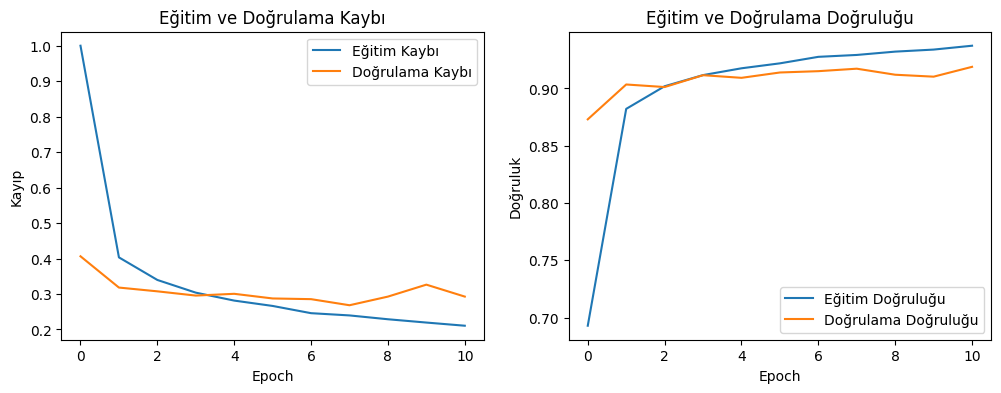

In [14]:
# history nesnesini eğitirken kaydedin
# history = model.fit(...)

# Kayıp ve doğruluk grafiklerini çizmek için
def plot_history(history):
    # Kayıp
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Kaybı')

    # Doğruluk
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    
    plt.show()

# history nesnesini kullanarak grafik çizme
plot_history(history)
